In [1]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, Bidirectional, GRU
import matplotlib.pyplot as plt


### Simple RNN

> It seems that the validation loss and validation accuracy are not improving significantly throughout the training process. A high validation loss and relatively lower validation accuracy may suggest that the model is not performing well on unseen data, indicating a potential issue with overfitting or an insufficiently complex model. The model achieves loss at 0.16 and the training accuracy is 93%.


> The validation accuracy: 77.46%.
> The validation loss: 75.01%.


In [ ]:
max_features = 5000
maxlen = 80
batch_size = 200

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train), len(x_test)))

17464789/17464789 [==============================] - 0s 0us/step
Loaded dataset with 25000 training samples, 25000 test samples


In [ ]:
print('---review---')
print(x_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [ ]:
for i in range(0,3):
  print(len(x_train[i]))

218
189
141


In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [ ]:
embedding_size = 32

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(SimpleRNN(32, activation='ReLU'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 32)            160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 164,853
Trainable params: 164,853
Non-trai

In [ ]:
from keras.optimizers import Adam

learning_rate = 0.01
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=learning_rate),
              metrics=['accuracy'])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(25000, 80)
(25000,)


In [ ]:
batch_size = 120
num_epochs = 30

x_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
x_train_upt, y_train_upt = x_train[batch_size:], y_train[batch_size:]


In [ ]:
x_train_upt.shape

(24880, 80)

In [ ]:
y_train_upt.shape

(24880,)

In [ ]:
history = model.fit(x_train_upt, y_train_upt,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
208/208 [==============================] - 8s 33ms/step - loss: 7.3004 - accuracy: 0.5820 - val_loss: 0.6637 - val_accuracy: 0.5917
Epoch 2/30
208/208 [==============================] - 7s 34ms/step - loss: 0.5207 - accuracy: 0.7383 - val_loss: 0.6211 - val_accuracy: 0.6750
Epoch 3/30
208/208 [==============================] - 7s 36ms/step - loss: 0.3967 - accuracy: 0.8244 - val_loss: 0.4392 - val_accuracy: 0.7750
Epoch 4/30
208/208 [==============================] - 7s 32ms/step - loss: 0.3433 - accuracy: 0.8520 - val_loss: 0.4782 - val_accuracy: 0.7583
Epoch 5/30
208/208 [==============================] - 8s 37ms/step - loss: 0.3108 - accuracy: 0.8709 - val_loss: 0.6194 - val_accuracy: 0.7000
Epoch 6/30
208/208 [==============================] - 6s 30ms/step - loss: 0.3014 - accuracy: 0.8747 - val_loss: 0.4969 - val_accuracy: 0.7667
Epoch 7/30
208/208 [==============================] - 9s 42ms/step - loss: 0.2896 - accuracy: 0.8789 - val_loss: 0.4123 - val_accuracy: 0.8333

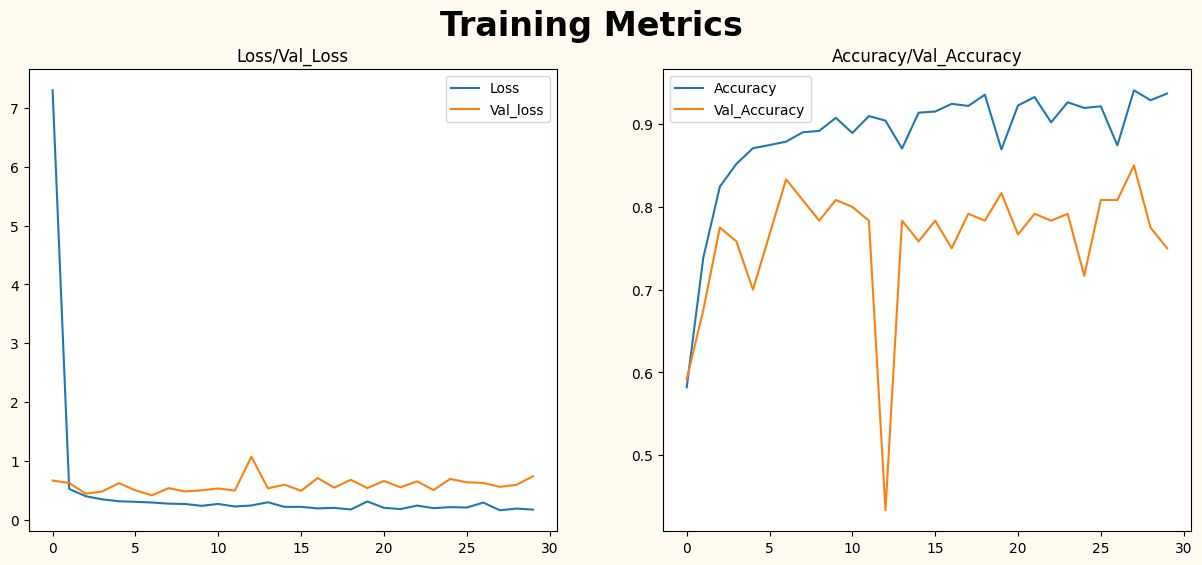

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history.history['loss'], label='Loss')
axes[0].plot(history.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history.history['accuracy'], label='Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

In [ ]:
loss_test, acc_test = model.evaluate(x_test, y_test, verbose=0)
print('The test accuracy: {:.2%}.'.format(acc_test))
print('The test score: {:.2%}.'.format(loss_test))

The test accuracy: 77.46%.
The test score: 75.01%.


### Gated Recurrent Unit (GRU)


> It is evident that the validation loss is increasing with each epoch, while the validation accuracy is not improving significantly. It started in a positive way to grow, but in the middle of training started going down. These observations indicate that the model may be overfitting to the training data and is not generalizing well to unseen data.


> The test accuracy: 80.96%. The test loss: 69.09%.





In [2]:
max_features = 5000
maxlen = 80
batch_size = 10
num_epochs = 10

In [4]:
(x_train_2, y_train_2), (x_test_2, y_test_2) = imdb.load_data(num_words=max_features)

print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train_2), len(x_test_2)))

Loaded dataset with 25000 training samples, 25000 test samples


In [5]:
x_train_2 = pad_sequences(x_train_2, maxlen=maxlen)
x_test_2 = pad_sequences(x_test_2, maxlen=maxlen)

print('X_train shape:', x_train_2.shape)
print('X_test shape:', x_test_2.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [9]:
from keras.regularizers import L2

model_2 = Sequential()
model_2.add(Embedding(input_dim=5000, output_dim=64))
model_2.add(Bidirectional(GRU(32, kernel_regularizer=L2(0.01))))
model_2.add(Dense(10))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 339,477
Trainable params: 339,477
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [11]:
history_2 = model_2.fit(x_train_2, y_train_2,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(x_test_2, y_test_2))

Epoch 1/10
2500/2500 [==============================] - 170s 66ms/step - loss: 0.4985 - accuracy: 0.7787 - val_loss: 0.3796 - val_accuracy: 0.8346
Epoch 2/10
2500/2500 [==============================] - 174s 70ms/step - loss: 0.3360 - accuracy: 0.8615 - val_loss: 0.4119 - val_accuracy: 0.8306
Epoch 3/10
2500/2500 [==============================] - 179s 71ms/step - loss: 0.2969 - accuracy: 0.8806 - val_loss: 0.3701 - val_accuracy: 0.8408
Epoch 4/10
2500/2500 [==============================] - 161s 64ms/step - loss: 0.2670 - accuracy: 0.8969 - val_loss: 0.3732 - val_accuracy: 0.8423
Epoch 5/10
2500/2500 [==============================] - 176s 70ms/step - loss: 0.2370 - accuracy: 0.9101 - val_loss: 0.3972 - val_accuracy: 0.8356
Epoch 6/10
2500/2500 [==============================] - 173s 69ms/step - loss: 0.2099 - accuracy: 0.9256 - val_loss: 0.4943 - val_accuracy: 0.8150
Epoch 7/10
2500/2500 [==============================] - 159s 64ms/step - loss: 0.1837 - accuracy: 0.9348 - val_loss: 0

In [12]:
loss_test, acc_test = model_2.evaluate(x_test_2, y_test_2, verbose=0)

print('The test accuracy: {:.2%}.'.format(acc_test))
print('The test loss: {:.2%}.'.format(loss_test))

The test accuracy: 80.96%.
The test loss: 69.09%.


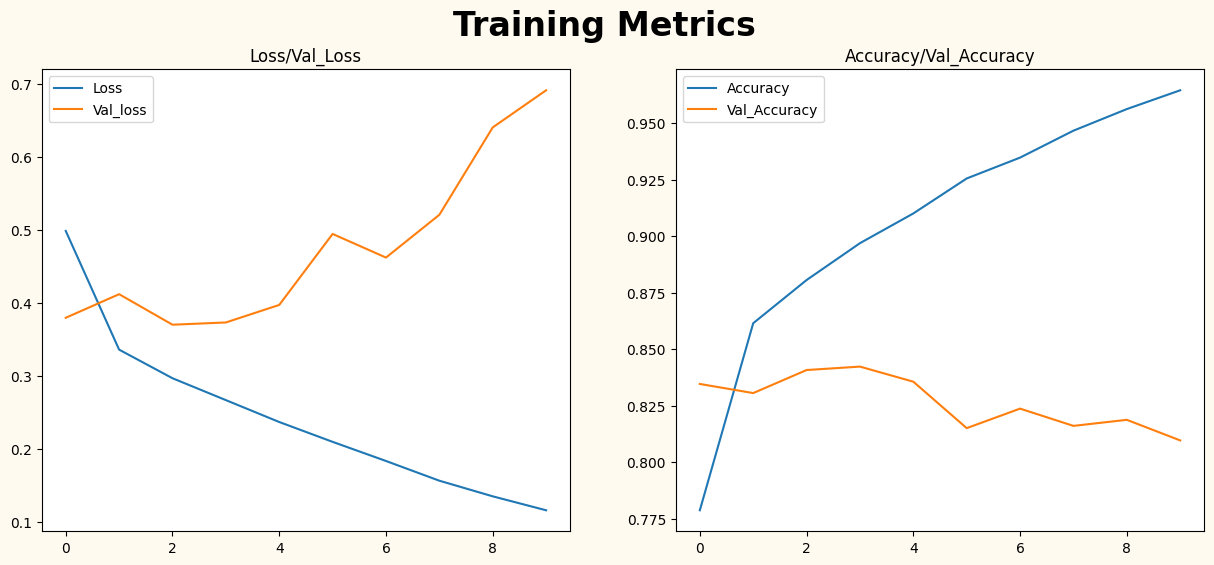

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_2.history['loss'], label='Loss')
axes[0].plot(history_2.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_2.history['accuracy'], label='Accuracy')
axes[1].plot(history_2.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()

### LSTM

>  the model achieves a relatively low training loss, 0.07, and high training accuracy, 97%. The validation value loss is at 74% and its accuracy is at 80%. Based on the validation value of loss this model doesn't align between the model's predictions and the ground truth. It should be way lower. Howerver, val acc is high, the model predicted the class labels for 80% of the samples.


> Test accuracy: 80.78%. Test loss:74.89%.




In [14]:
max_features = 5000
maxlen = 80
batch_size = 10

In [15]:
(x_train_3, y_train_3), (x_test_3, y_test_3) = imdb.load_data(num_words=max_features)
print('Loaded dataset with {} training samples, {} test samples'.format(len(x_train_3), len(x_test_3)))

Loaded dataset with 25000 training samples, 25000 test samples


In [16]:
x_train_3 = pad_sequences(x_train_3, maxlen=maxlen)
x_test_3 = pad_sequences(x_test_3, maxlen=maxlen)
print('X_train shape:', x_train_3.shape)
print('X_test shape:', x_test_3.shape)

X_train shape: (25000, 80)
X_test shape: (25000, 80)


In [17]:
embedding_size=32

model_3 = Sequential()
model_3.add(Embedding(max_features, embedding_size))
model_3.add(LSTM(100))
model_3.add(Dense(1, activation='sigmoid'))


model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 10
batch_size_3 = 32

history_3 = model_3.fit(x_train_3, y_train_3,
                        batch_size=batch_size_3,
                        epochs=num_epochs,
                        validation_data=(x_test_3, y_test_3))

Epoch 1/10
782/782 [==============================] - 99s 123ms/step - loss: 0.4608 - accuracy: 0.7688 - val_loss: 0.3708 - val_accuracy: 0.8380
Epoch 2/10
782/782 [==============================] - 87s 111ms/step - loss: 0.3214 - accuracy: 0.8628 - val_loss: 0.3888 - val_accuracy: 0.8246
Epoch 3/10
782/782 [==============================] - 83s 106ms/step - loss: 0.2731 - accuracy: 0.8882 - val_loss: 0.3819 - val_accuracy: 0.8337
Epoch 4/10
782/782 [==============================] - 83s 106ms/step - loss: 0.2314 - accuracy: 0.9072 - val_loss: 0.4252 - val_accuracy: 0.8321
Epoch 5/10
782/782 [==============================] - 86s 110ms/step - loss: 0.1965 - accuracy: 0.9226 - val_loss: 0.4393 - val_accuracy: 0.8258
Epoch 6/10
782/782 [==============================] - 83s 106ms/step - loss: 0.1687 - accuracy: 0.9355 - val_loss: 0.5124 - val_accuracy: 0.8247
Epoch 7/10
782/782 [==============================] - 85s 109ms/step - loss: 0.1434 - accuracy: 0.9458 - val_loss: 0.4969 - val_ac

In [19]:
loss, acc = model_3.evaluate(x_test_3, y_test_3, batch_size=batch_size_3)

print('Test losss:{:.2%}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

782/782 [==============================] - 19s 24ms/step - loss: 0.7489 - accuracy: 0.8078
Test losss:74.89%
Test accuracy: 80.78%


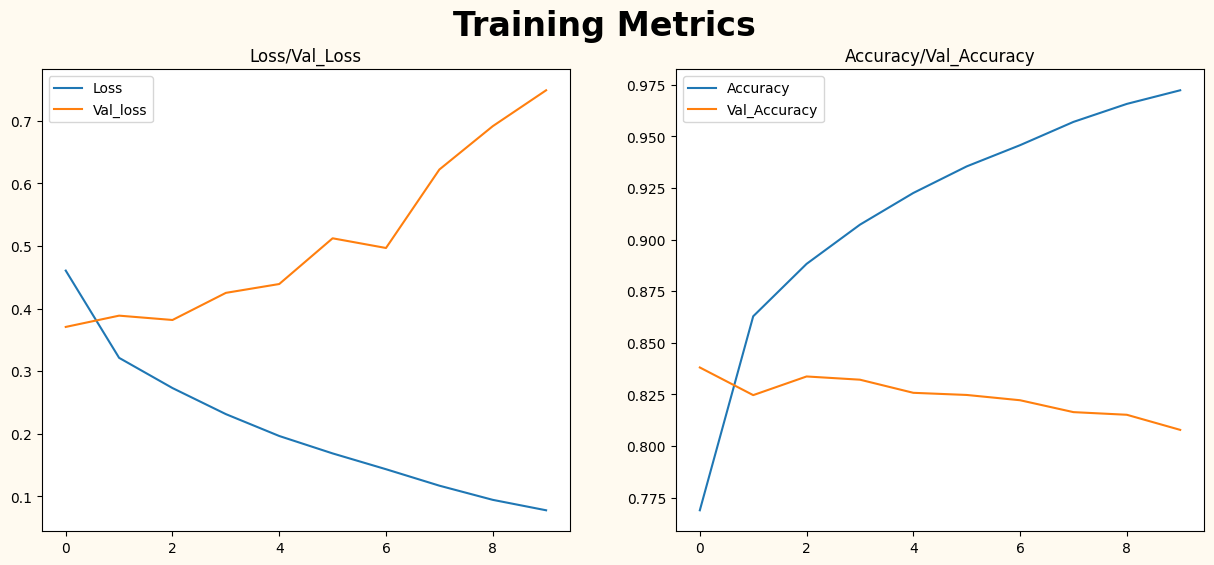

In [20]:
fig, axes = plt.subplots(1,2, figsize=(15,6))
fig.suptitle('Training Metrics', fontsize=24, fontweight='bold')
fig.set_facecolor('floralwhite')

axes[0].set_title('Loss/Val_Loss')
axes[0].plot(history_3.history['loss'], label='Loss')
axes[0].plot(history_3.history['val_loss'], label='Val_loss')
axes[0].legend()

axes[1].set_title('Accuracy/Val_Accuracy')
axes[1].plot(history_3.history['accuracy'], label='Accuracy')
axes[1].plot(history_3.history['val_accuracy'], label='Val_Accuracy')
axes[1].legend()

plt.show()